# Assistant (Preview)


Azure OpenAI Assistants (Preview) allows you to create AI assistants tailored to your needs through custom instructions and augmented by advanced tools like code interpreter, and custom functions. In this article we'll provide an in-depth walkthrough of getting started with the Assistants API.


## API Version: 2024-02-15-preview
Check availability: 

https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models#assistants-preview

## Creating an assisstant

In [2]:
import os
import json
from openai import AzureOpenAI
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()
    
client = AzureOpenAI(
  azure_endpoint = os.getenv("OPENAI_API_ENDPOINT"), 
  api_key=os.getenv("OPENAI_API_KEY"),  
  api_version=os.getenv("OPENAI_API_VERSION")
)

dalleModel = os.getenv("DALLE_MODEL")
gpt3TurboModel = os.getenv("GPT3_MODEL")
gpt4Model = os.getenv("GPT4_MODEL")
visionModel = os.getenv("VISION_MODEL")
embeddingsModel = os.getenv("EMBEDDINGS_MODEL")

# Create an assistant
assistant = client.beta.assistants.create(
    name="Data Visualization",
    instructions=f"You are a helpful AI assistant who makes interesting visualizations based on data." 
    f"You have access to a sandboxed environment for writing and testing code."
    f"When you are asked to create a visualization you should follow these steps:"
    f"1. Write the code."
    f"2. Anytime you write new code display a preview of the code to show your work."
    f"3. Run the code to confirm that it runs."
    f"4. If the code is successful display the visualization."
    f"5. If the code is unsuccessful display the error message and try to revise the code and rerun going through the steps from above again.",
    tools=[{"type": "code_interpreter"}],
    model=gpt4Model
)

In [3]:
print(assistant.model_dump_json(indent=2))

{
  "id": "asst_LyyiFMO7EjbiK6wCUfqD7OHO",
  "created_at": 1715938624,
  "description": null,
  "file_ids": [],
  "instructions": "You are a helpful AI assistant who makes interesting visualizations based on data.You have access to a sandboxed environment for writing and testing code.When you are asked to create a visualization you should follow these steps:1. Write the code.2. Anytime you write new code display a preview of the code to show your work.3. Run the code to confirm that it runs.4. If the code is successful display the visualization.5. If the code is unsuccessful display the error message and try to revise the code and rerun going through the steps from above again.",
  "metadata": {},
  "model": "gpt-4",
  "name": "Data Visualization",
  "object": "assistant",
  "tools": [
    {
      "type": "code_interpreter"
    }
  ],
  "top_p": 1.0,
  "temperature": 1.0,
  "response_format": "auto"
}


## Creating a thread

Thread is a conversation session between an Assistant and a user. Threads store Messages and automatically handle truncation to fit content into a model’s context.

In [11]:
# Create a thread
thread = client.beta.threads.create()
print(thread)

Thread(id='thread_jh6q7eVpmuqNX0PZVCrnNH3M', created_at=1715938758, metadata={}, object='thread')


In [12]:
# Add a user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Create a visualization of a sinewave"
)

In [13]:
# list thread messages
thread_messages = client.beta.threads.messages.list(thread.id)
print(thread_messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_JNkYxttnDTwCME3BKs0IiKXo",
      "assistant_id": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Create a visualization of a sinewave"
          },
          "type": "text"
        }
      ],
      "created_at": 1715938760,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "thread_id": "thread_jh6q7eVpmuqNX0PZVCrnNH3M"
    }
  ],
  "object": "list",
  "first_id": "msg_JNkYxttnDTwCME3BKs0IiKXo",
  "last_id": "msg_JNkYxttnDTwCME3BKs0IiKXo",
  "has_more": false
}


In [14]:
# create a thread
# you can also use intructions here to override the default instructions
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

In [15]:
# retrieve thread status
# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

in_progress


In [16]:
# check the status of the run
import time
from IPython.display import clear_output

start_time = time.time()

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')
    clear_output(wait=True)

messages = client.beta.threads.messages.list(
  thread_id=thread.id
) 

print(f'Status: {status}')
print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
print(messages.model_dump_json(indent=2))

Status: completed
Elapsed time: 0 minutes 27 seconds
{
  "data": [
    {
      "id": "msg_xapKMtnNnBMu8il7en4snpwl",
      "assistant_id": "asst_LyyiFMO7EjbiK6wCUfqD7OHO",
      "content": [
        {
          "image_file": {
            "file_id": "assistant-j004gT3u9VqEELExjEjP7VXV"
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "Here is the visualization of the sine wave for \\(y = \\sin(x)\\) over one period from \\(0\\) to \\(2\\pi\\). If you need any modifications or further explanations, please let me know!"
          },
          "type": "text"
        }
      ],
      "created_at": 1715938787,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_wffbeT5z5XoZpkTaqd8rL9sa",
      "thread_id": "thread_jh6q7eVpmuqNX0PZVCrnNH3M"
    },
    {
      "id": "msg_JNkYxttnDTwCME3BKs0IiKXo",
      "assistant_id": null,
      "c

In [17]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_xapKMtnNnBMu8il7en4snpwl",
      "assistant_id": "asst_LyyiFMO7EjbiK6wCUfqD7OHO",
      "content": [
        {
          "image_file": {
            "file_id": "assistant-j004gT3u9VqEELExjEjP7VXV"
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "Here is the visualization of the sine wave for \\(y = \\sin(x)\\) over one period from \\(0\\) to \\(2\\pi\\). If you need any modifications or further explanations, please let me know!"
          },
          "type": "text"
        }
      ],
      "created_at": 1715938787,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_wffbeT5z5XoZpkTaqd8rL9sa",
      "thread_id": "thread_jh6q7eVpmuqNX0PZVCrnNH3M"
    },
    {
      "id": "msg_JNkYxttnDTwCME3BKs0IiKXo",
      "assistant_id": null,
      "content": [
        {
          "text": {
            

In [18]:
# show the file name
data = json.loads(messages.model_dump_json(indent=2))  # Load JSON data into a Python object
image_file_id = data['data'][0]['content'][0]['image_file']['file_id']

print(image_file_id)  # Outputs: assistant-1YGVTvNzc2JXajI5JU9F0HMD

assistant-j004gT3u9VqEELExjEjP7VXV


In [19]:
# download the file
content = client.files.content(image_file_id)

image= content.write_to_file("sinewave.png")

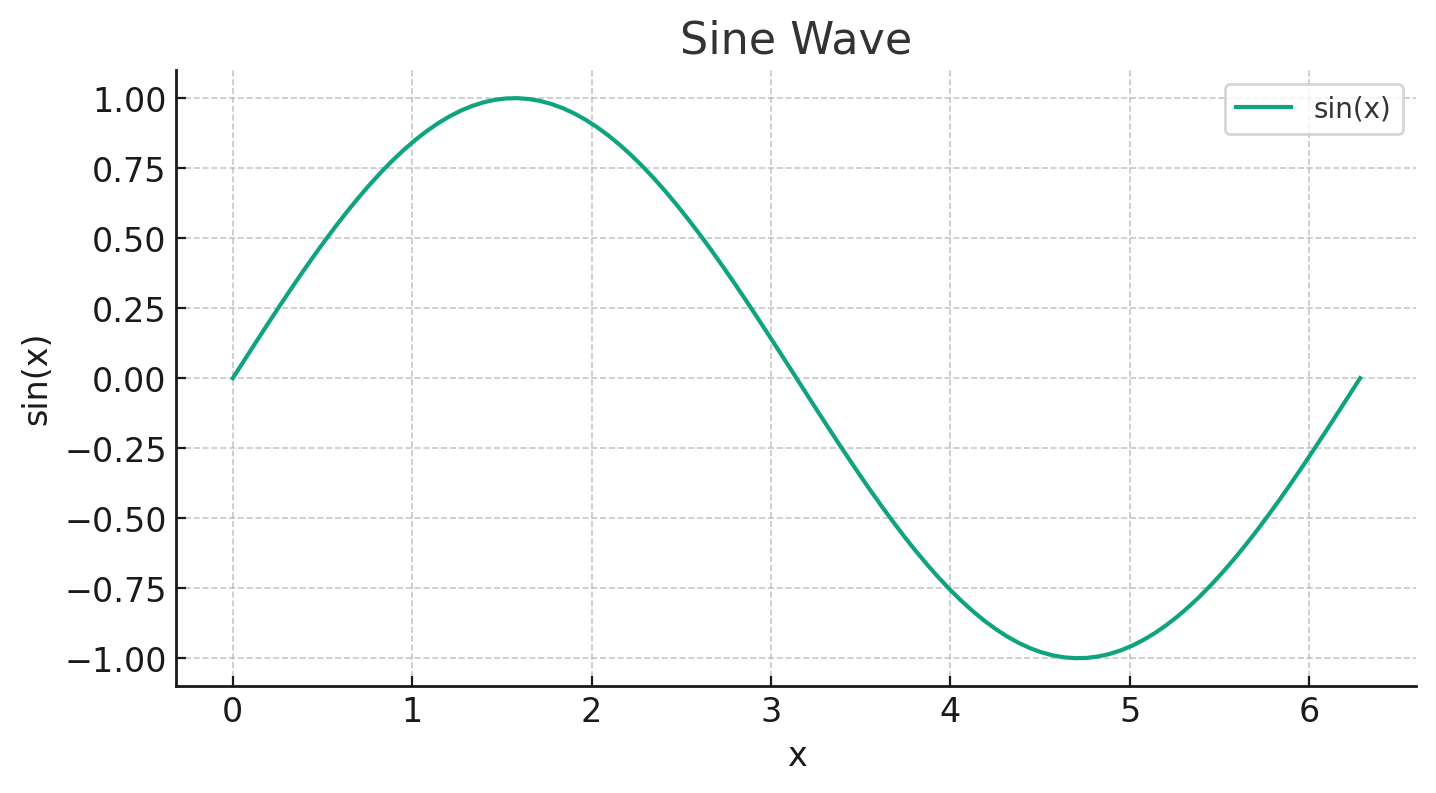

In [20]:
# rewrite the code to display the image in jupyter notebook

from PIL import Image

# Display the image in the default image viewer
image = Image.open("sinewave.png")
image.show()

## Ask follow up questions

In [32]:
# Add a new user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Show me the generated code you used to generate the sinewave"
)

In [33]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  #instructions="New instructions" #You can optionally provide new instructions  but these will override the default instructions
)

queued


In [37]:
# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

completed


In [38]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_sa7I5LHLWwGhdsGcmowiV7Rk",
      "assistant_id": "asst_LyyiFMO7EjbiK6wCUfqD7OHO",
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Certainly! Here's the Python code that I used to generate the sine wave visualization:\n\n```python\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Define x range and calculate the sine values\nx = np.linspace(0, 2 * np.pi, 100)\ny = np.sin(x)\n\n# Create the plot\nplt.figure(figsize=(8, 4))\nplt.plot(x, y, label='sin(x)')\nplt.title('Sine Wave')\nplt.xlabel('x')\nplt.ylabel('sin(x)')\nplt.grid(True)\nplt.legend()\nplt.show()\n```\n\nThis code uses NumPy for numerical calculations and Matplotlib for plotting. It creates a range of \\(x\\) values from 0 to \\(2\\pi\\) and computes the sine of each value, plotting the result as a smooth sine wave."
          },
          "type": "text"
        }
      ],
      "created_at": 1715938938,
      "file_ids": [],
   

In [39]:
# Print the code
data = json.loads(messages.model_dump_json(indent=2))
code = data['data'][0]['content'][0]['text']['value']
print(code)

Certainly! Here's the Python code that I used to generate the sine wave visualization:

```python
import numpy as np
import matplotlib.pyplot as plt

# Define x range and calculate the sine values
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)')
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.legend()
plt.show()
```

This code uses NumPy for numerical calculations and Matplotlib for plotting. It creates a range of \(x\) values from 0 to \(2\pi\) and computes the sine of each value, plotting the result as a smooth sine wave.
